<a href="https://colab.research.google.com/github/joshkin2/Arewa_DS-ML_assignments/blob/main/Logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
pumpk= pd.read_csv("US-pumpkins.csv")
selected_col= ["City Name","Package","Item Size","Variety","Color","Origin"]
new_pumpk= pumpk.drop([l for l in pumpk.columns if l not in selected_col],axis=1)
new_pumpk.dropna(inplace=True)
new_pumpk.info()
new_pumpk.head()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 2 to 1698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City Name  991 non-null    object
 1   Package    991 non-null    object
 2   Variety    991 non-null    object
 3   Origin     991 non-null    object
 4   Item Size  991 non-null    object
 5   Color      991 non-null    object
dtypes: object(6)
memory usage: 54.2+ KB


,City Name,Package,Variety,Origin,Item Size,Color
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
5,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
6,BALTIMORE,36 inch bins,HOWDEN TYPE,MARYLAND,med,ORANGE


In [6]:
from sklearn.linear_model import LogisticRegression
selected_f=["City Name","Variety","Item Size", "Origin","Package"]
X=new_pumpk[selected_f]
y=new_pumpk["Color"]

# Encode the target variable 'Color'
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# One-hot encode the categorical features
X_train_encoded = pd.get_dummies(X_train, columns=selected_f)
X_test_encoded = pd.get_dummies(X_test, columns=selected_f)

# Align columns - crucial for consistent feature sets after one-hot encoding
train_cols = X_train_encoded.columns
test_cols = X_test_encoded.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_encoded[c] = 0
missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_encoded[c] = 0
X_test_encoded = X_test_encoded[train_cols]


log_reg= LogisticRegression(max_iter=1000) # Increased max_iter for convergence
log_reg.fit(X_train_encoded, y_train)
y_pred= log_reg.predict(X_test_encoded)
evaluation= classification_report(y_test, y_pred)
accr= accuracy_score(y_test, y_pred)
print(evaluation)
print(accr)
print(f"Accuracy is: {accr}")

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       157
           1       0.83      0.69      0.75        42

    accuracy                           0.90       199
   macro avg       0.87      0.83      0.85       199
weighted avg       0.90      0.90      0.90       199

0.9045226130653267
Accuracy is: 0.9045226130653267


In [7]:
print(confusion_matrix(y_test, y_pred))

[[151   6]
 [ 13  29]]


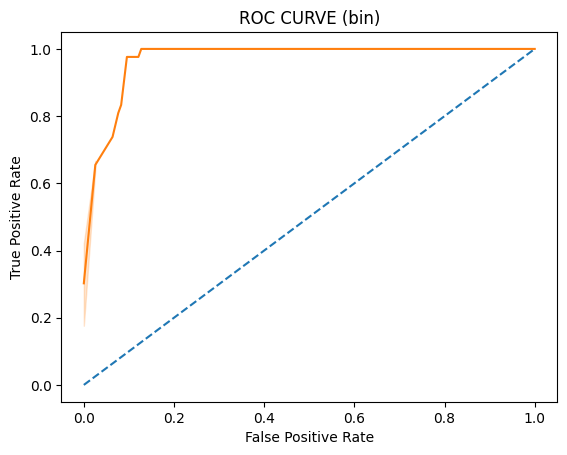

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
y_scores= log_reg.predict_proba(X_test_encoded)
fpr, tpr, thresholds= roc_curve(y_test, y_scores[:,1])
sns.lineplot(x=[0,1],y=[0,1], linestyle="--")
sns.lineplot(x=fpr, y=tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE (bin)")
plt.show()

In [10]:
auc= roc_auc_score(y_test, y_scores[:,1])
print(f"AUC: {auc}")

AUC: 0.97300576281468


**#AUC of 0.97 is very good with an accuracy of 90% text.**